In [1]:
conda install -c conda-forge pytrends

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

kw_list = ["Ixom", "Orica Chemicals", "Coogee Chemicals", "Cleveland Bay"]
pytrends.build_payload(kw_list, cat=12, timeframe='2009-01-01 2015-01-01', geo='AU', gprop='')
data_before_2015 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU', gprop='')
data_after_2015 = pytrends.interest_over_time()

In [3]:
mean_before = round(data_before_2015.mean(), 2)
mean_after = round(data_after_2015.mean(), 2)
for kw in kw_list:
    print(kw + ":" + str(mean_before[kw]))

Ixom:0.0
Orica Chemicals:23.08
Coogee Chemicals:23.66
Cleveland Bay:6.22


In [4]:
for kw in kw_list:
    print(kw + ":" + str(mean_after[kw]))

Ixom:41.61
Orica Chemicals:8.0
Coogee Chemicals:32.59
Cleveland Bay:14.24


In [5]:
data_after_2015.to_csv('trends data after 2015.csv')
data_after_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2015-03-01,18,9,28,19,False
2015-04-01,68,58,20,10,False
2015-05-01,36,63,37,0,False
2015-06-01,48,0,48,10,False
2015-07-01,45,27,55,18,False
...,...,...,...,...,...
2021-11-01,41,0,34,8,False
2021-12-01,25,0,17,9,False
2022-01-01,31,8,39,16,False


In [6]:
data_before_2015.to_csv('trends data before 2015.csv')
data_before_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,38,19,0,False
2009-02-01,0,19,75,0,False
2009-03-01,0,0,49,0,False
2009-04-01,0,0,17,0,False
2009-05-01,0,78,32,0,False
...,...,...,...,...,...
2014-09-01,0,20,46,5,False
2014-10-01,0,34,30,10,False
2014-11-01,0,60,30,10,False


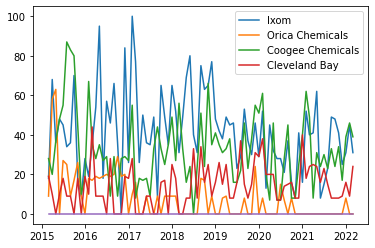

In [7]:
import matplotlib.pyplot as plt

plt.plot(data_after_2015)
plt.legend(kw_list)
plt.show()

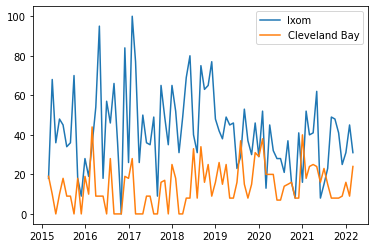

In [8]:
focus = ["Ixom", "Cleveland Bay"]
plt.plot(data_after_2015[focus])
plt.legend(focus)
plt.show()

In [9]:
region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
region

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay
geoName,,,,
Australian Capital Territory,0,0,0,0
New South Wales,67,11,17,5
Northern Territory,0,0,0,0
Queensland,15,0,28,57
South Australia,100,0,0,0
Tasmania,0,0,0,0
Victoria,72,14,12,2
Western Australia,14,0,86,0


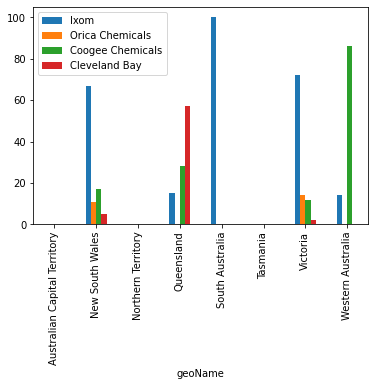

In [10]:
region.plot(kind = 'bar')
plt.show()

In [11]:
pytrends.related_queries() # related queries in last 7 years

{'Ixom': {'top':              query  value
  0            orica    100
  1   ixom chemicals     57
  2      ixom botany     24
  3  orica chemicals     22,
  'rising':              query    value
  0            orica  2102100
  1   ixom chemicals  1192900
  2      ixom botany   496750
  3  orica chemicals   471900},
 'Orica Chemicals': {'top':   query  value
  0  ixom    100,
  'rising':   query    value
  0  ixom  2476550},
 'Coogee Chemicals': {'top': None, 'rising': None},
 'Cleveland Bay': {'top':           query  value
  0  first choice    100,
  'rising':           query  value
  0  first choice    800}}

In [12]:
import pandas as pd
bigdata = pd.concat([data_before_2015, data_after_2015], sort=False)

In [13]:
bigdata

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,38,19,0,False
2009-02-01,0,19,75,0,False
2009-03-01,0,0,49,0,False
2009-04-01,0,0,17,0,False
2009-05-01,0,78,32,0,False
...,...,...,...,...,...
2021-11-01,41,0,34,8,False
2021-12-01,25,0,17,9,False
2022-01-01,31,8,39,16,False
